In [1]:
import pandas as pd
from pymol import cmd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits import mplot3d

In [4]:
path = "C:\\Benj\KresslerLab_BP\\Structure Claudio\\Sch9 MDAnalysis\\last\\"
cmd.load(path+'Sch9_last_steps.pse')
objects = cmd.get_object_list()
print(len(objects))
xyz = []
for object in objects:
    xyz.append(cmd.get_coords('name CA and '+object, 1))

print(np.array(xyz[5]).shape)


6
(824, 3)


In [2]:
path = "C:\\Benj\KresslerLab_BP\\Structure Claudio\\Sch9 MDAnalysis\\"

cmd.load(path+'Sch9_em.pdb')
cmd.load_traj(path+'Sch9_1_md_aligned.xtc')
Sch9_1 = []
for state in range(1,cmd.count_states()):
   temp = np.array(cmd.get_coords(state=state, selection='name CA')).flatten()
   Sch9_1.append(temp)
cmd.delete('Sch9_em')

cmd.load(path+'Sch9_em.pdb')
cmd.load_traj(path+'Sch9_2_md_aligned.xtc')
Sch9_2 = []
for state in range(1,cmd.count_states()):
   temp = np.array(cmd.get_coords(state=state, selection='name CA')).flatten()
   Sch9_2.append(temp)
cmd.delete('Sch9_em')

cmd.load(path+'Sch9_em.pdb')
cmd.load_traj(path+'Sch9_3_md_aligned.xtc')
Sch9_3 = []
for state in range(1,cmd.count_states()):
   temp = np.array(cmd.get_coords(state=state, selection='name CA')).flatten()
   Sch9_3.append(temp)
cmd.delete('Sch9_em')

cmd.load(path+'Sch9.S288J_em.pdb')
cmd.load_traj(path+'Sch9.S288J_1_md_aligned.xtc')
Sch9S288J_1 = []
for state in range(1,cmd.count_states()):
   temp = np.array(cmd.get_coords(state=state, selection='name CA')).flatten()
   Sch9S288J_1.append(temp)
cmd.delete('Sch9.S288J_em')

cmd.load(path+'Sch9.S288J_em.pdb')
cmd.load_traj(path+'Sch9.S288J_2_md_aligned.xtc')
Sch9S288J_2 = []
for state in range(1,cmd.count_states()):
   temp = np.array(cmd.get_coords(state=state, selection='name CA')).flatten()
   Sch9S288J_2.append(temp)
cmd.delete('Sch9.S288J_em')

cmd.load(path+'Sch9.S288J_em.pdb')
cmd.load_traj(path+'Sch9.S288J_3_md_aligned.xtc')
Sch9S288J_3 = []
for state in range(1,cmd.count_states()):
   temp = np.array(cmd.get_coords(state=state, selection='name CA')).flatten()
   Sch9S288J_2.append(temp)
cmd.delete('Sch9.S288J_em')

In [18]:
xyz = Sch9_1.copy()
print(len(xyz))
xyz.extend(Sch9_2)
xyz.extend(Sch9_3)
xyz.extend(Sch9S288J_1)
xyz.extend(Sch9S288J_2)
xyz.extend(Sch9S288J_3)


xyz_arr = np.array(xyz)
print(xyz_arr.shape)
pca = PCA(n_components=4)
xyz_pca = pca.fit_transform(xyz_arr)
#xyz_pca2 = pca.fit_transform(xyz2[1:])
#px.scatter_3d(x=xyz_pca[0], y=xyz_pca[1], z=xyz_pca[2])
#plt.scatter(xyz_pca.T[1], xyz_pca.T[0])
#plt.scatter(xyz_pca2.T[1], xyz_pca2.T[0], color='lightblue')
pca.explained_variance_ratio_

6000
(36000, 2472)


array([0.32483202, 0.15454775, 0.1099736 , 0.09313311], dtype=float32)

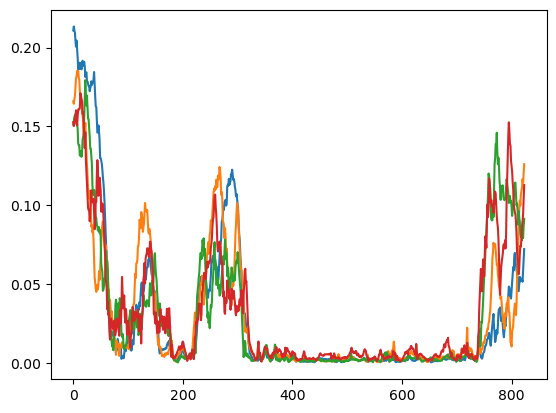

In [29]:
cmd.load(path+'Sch9_em.pdb')
cmd.load(path+'Sch9.S288J_em.pdb')
components = []
count1 = 1
for component in pca.components_:
    count2 = 1
    comp = np.abs(component).reshape(int(len(component)/3), 3).T
    comp_sum = comp[0]+comp[1]+comp[2]
    components.append(comp_sum)
    for v in comp_sum:
        cmd.alter('Sch9_em and resi '+str(count2)+' and n. CA', "b=%s"%v)
        cmd.alter('Sch9.S288J_em and resi '+str(count2)+' and n. CA', "b=%s"%v)
        count2 = count2 + 1
    #with open(path+'PC'+str(count)+'.txt', 'w') as file:
    #    for v in comp_sum:
    #        file.write(str(v)+'\n')
    cmd.save(path+'Sch9_em_PC'+str(count1)+'.pdb', 'Sch9_em')
    cmd.save(path+'Sch9.S288J_em_PC'+str(count1)+'.pdb', 'Sch9.S288J_em')
    plt.plot(comp_sum)
    count1 = count1 + 1

cmd.delete('Sch9_em')

(3, 824)


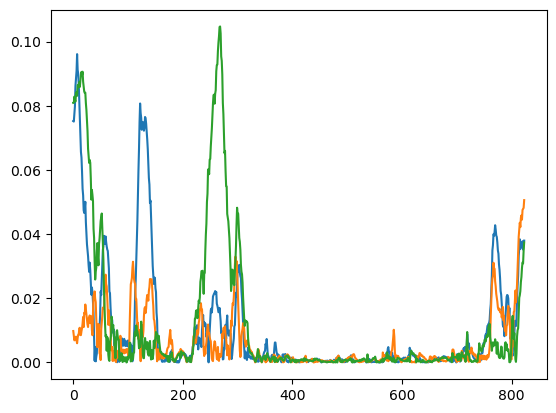

In [14]:
#pca.components_.shape
comp1 = np.abs(pca.components_[1]).reshape(824, 3).T
print(comp1.shape)
plt.plot(comp1[0])
plt.plot(comp1[1])
plt.plot(comp1[2])

In [8]:
comp1_add = comp1[0]+comp1[1]+comp1[2]
#plt.plot(comp1_add)
px.line(comp1_add)

In [12]:
#z1 = range(len(xyz_pca.T[0])/2)
labels = ['Sch9_1'] * 6000
labels.extend(['Sch9_2'] * 6000)
labels.extend(['Sch9_3'] * 6000)
labels.extend(['Sch9.S288J_1'] * 6000)
labels.extend(['Sch9.S288J_2'] * 6000)
labels.extend(['Sch9.S288J_3'] * 6000)

time = range(6000)
time2 = np.concatenate([time, time, time, time, time, time])
print(len(time2))

#px.scatter_3d(x=xyz_pca.T[0], y=xyz_pca.T[1], z=z)
fig = px.scatter_3d(x=xyz_pca.T[0], y=xyz_pca.T[1], z=xyz_pca.T[2], color=labels)
#fig = px.scatter_3d(x=time2, y=xyz_pca.T[1], z=xyz_pca.T[0], color=labels)
#fig = px.line_3d(x=time2, y=xyz_pca.T[0], z=xyz_pca.T[1], color=labels)
fig.update_traces(marker=dict(size=1))
fig.show()

# Prepare 3D graph
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(xyz_pca.T[0], xyz_pca.T[1], xyz_pca.T[2])
#ax.scatter3D(xyz_pca2.T[0], xyz_pca2.T[1], xyz_pca2.T[2])

36000


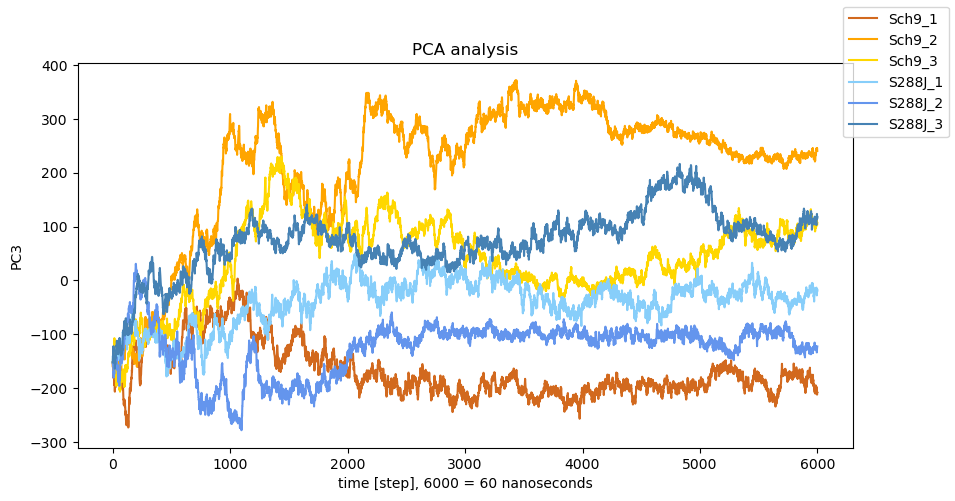

In [30]:
legends = ['Sch9_1','Sch9_2','Sch9_3','S288J_1','S288J_2','S288J_3']
PC = 2
#color = ['blue'] * 6000
#color.extend(['lightblue'] * 6000)
#plt.scatter(time2, xyz_pca.T[0], c=color)
plt.figure(figsize=(10,5))
plt.title('PCA analysis')
plt.plot(time, xyz_pca.T[PC][:6000], color='chocolate')
plt.plot(time, xyz_pca.T[PC][6000:12000], color='orange')
plt.plot(time, xyz_pca.T[PC][12000:18000], color='gold')
plt.plot(time, xyz_pca.T[PC][18000:24000], color='lightskyblue')
plt.plot(time, xyz_pca.T[PC][24000:30000], color='cornflowerblue')
plt.plot(time, xyz_pca.T[PC][30000:36000], color='steelblue')

plt.figlegend(legends)
plt.xlabel('time [step], 6000 = 60 nanoseconds')
plt.ylabel('PC'+str(PC+1))
plt.savefig(path+'PCA_PC'+str(PC+1)+'.pdf')

(6, 2472)
(6, 2)
[126.2292   -43.801926]


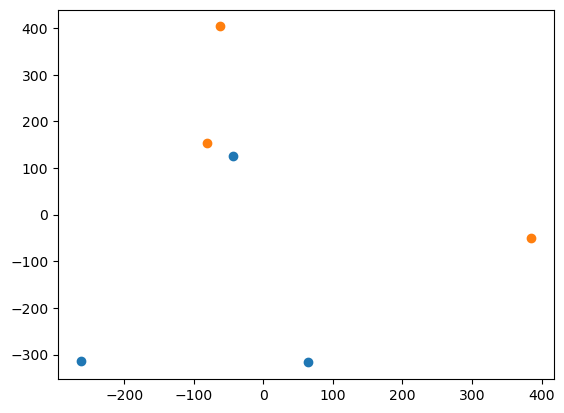

In [30]:
#xyz = xyz[:5]
xyz_flat = []
for a in xyz:
    a = np.array(a).flatten()
    xyz_flat.append(a)
xyz_flat = np.array(xyz_flat)
print(xyz_flat.shape)
#xyz_flat = xyz_flat.T
#print(xyz_flat.shape)
pca = PCA(n_components=2)
xyz_pca = pca.fit_transform(xyz_flat)
print(xyz_pca.shape)
print(xyz_pca[1])
plt.scatter(xyz_pca.T[1][:3], xyz_pca.T[0][:3])
plt.scatter(xyz_pca.T[1][3:], xyz_pca.T[0][3:])